# Support Vector Machines from Scratch

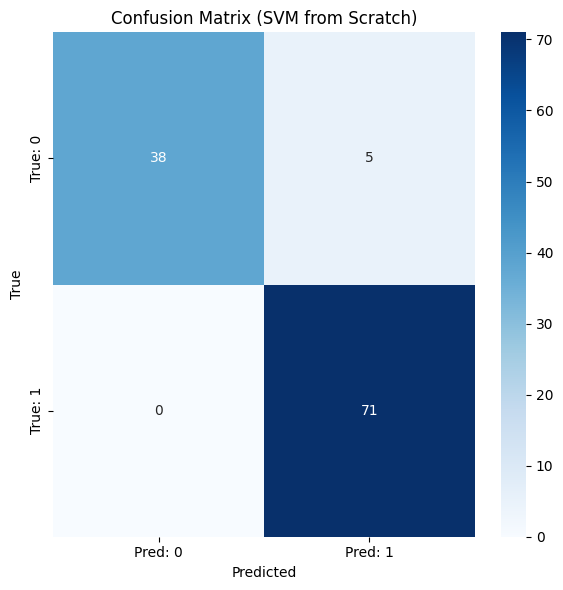

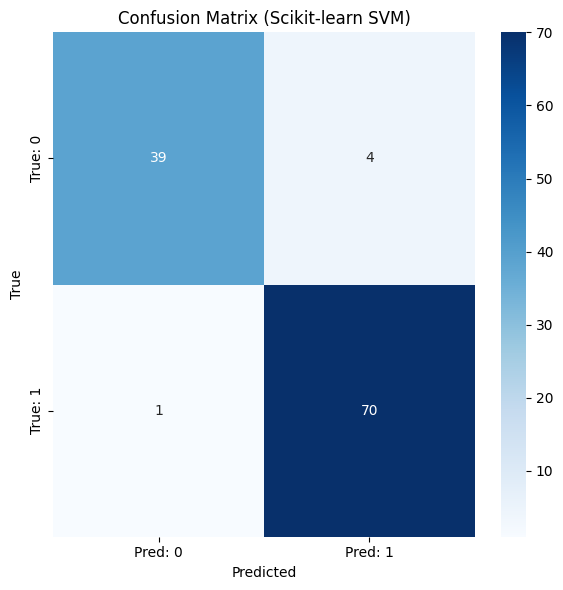

accuracy (svm from scratch): 95.61%
accuracy (scikit-learn svm): 95.61%


In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns

# 1. support vector machine (svm) from scratch
class SVMFromScratch:
    def __init__(self, learning_rate=0.01, lambda_param=0.01, n_iter=1000):
        self.learning_rate = learning_rate
        self.lambda_param = lambda_param
        self.n_iter = n_iter

    def fit(self, X, y):
        # initialize weights and bias
        self.w = np.zeros(X.shape[1])
        self.b = 0

        # label transformation to make sure classes are 1 and -1
        y = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iter):
            for idx, x_i in enumerate(X):
                # if the point is correctly classified
                if y[idx] * (np.dot(x_i, self.w) + self.b) >= 1:
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w)  # regularization term
                else:
                    # if the point is misclassified
                    self.w -= self.learning_rate * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                    self.b -= self.learning_rate * y[idx]

    def predict(self, X):
        # calculate the decision function
        decision = np.dot(X, self.w) + self.b
        # return 1 for positive class and -1 for negative class
        return np.sign(decision)

# 2. load dataset
data = load_breast_cancer()
X = data.data  # features
y = data.target  # labels

# split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. train svm from scratch
svm_scratch = SVMFromScratch()
svm_scratch.fit(X_train, y_train)
y_pred_scratch_svm = svm_scratch.predict(X_test)

# 4. convert predictions from -1, 1 to 0, 1
y_pred_scratch_svm = np.where(y_pred_scratch_svm == -1, 0, 1)

# 5. train svm using scikit-learn
from sklearn.svm import SVC
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(X_train, y_train)
y_pred_sklearn_svm = svm_sklearn.predict(X_test)

# 6. compute confusion matrix for both svm from scratch and sklearn svm
cm_scratch_svm = confusion_matrix(y_test, y_pred_scratch_svm)
cm_sklearn_svm = confusion_matrix(y_test, y_pred_sklearn_svm)

# plot confusion matrix for svm from scratch
plt.figure(figsize=(6, 6))
sns.heatmap(cm_scratch_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix (SVM from Scratch)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# plot confusion matrix for sklearn svm
plt.figure(figsize=(6, 6))
sns.heatmap(cm_sklearn_svm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred: 0', 'Pred: 1'], yticklabels=['True: 0', 'True: 1'])
plt.title('Confusion Matrix (Scikit-learn SVM)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

# 7. compare accuracy of both models
accuracy_scratch_svm = np.mean(y_pred_scratch_svm == y_test)
accuracy_sklearn_svm = np.mean(y_pred_sklearn_svm == y_test)

print(f"accuracy (svm from scratch): {accuracy_scratch_svm * 100:.2f}%")
print(f"accuracy (scikit-learn svm): {accuracy_sklearn_svm * 100:.2f}%")
